In [66]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 加载自定义工具函数
from testCases import *
from dnn_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [81]:
def initialize_parameters_deep(layer_dims):
#     np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
        parameters['b'+ str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W'+ str(l)].shape == (layer_dims[l], layer_dims[l-1]))
    return parameters;

In [88]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = ",parameters['W1'],"\nb1 = ",parameters['b1'],"\nW2 = ",parameters['W2'],"\nb2 = ",parameters['b2'])

W1 =  [[-2.32073739e-01 -2.08437781e-01 -2.08532084e-01  3.80596805e-04
   9.90200959e-01]
 [-5.61800021e-01  3.24358754e-01  4.15193978e-01  4.26799107e-01
  -4.57544267e-01]
 [ 1.18159354e-01  2.57795886e-01  3.34872589e-01  7.49103564e-02
  -1.00708322e-01]
 [-7.15124474e-02 -7.93656271e-01  2.80502618e-01 -7.10529854e-02
  -5.78816359e-01]] 
b1 =  [[0.]
 [0.]
 [0.]
 [0.]] 
W2 =  [[-0.15136447  0.23445494 -0.00812897 -0.42135411]
 [ 0.18320685  0.60043872 -0.44653592 -0.36015918]
 [ 0.03642697 -0.67141199 -0.27420542  0.20022849]] 
b2 =  [[0.]
 [0.]
 [0.]]


In [43]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
#     print("W.shape[0] = ", W.shape[0], "; A.shape[1] = ", A.shape[1])
#     print("W = ", W,"\nA = ", A)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    return Z,(A,W,b)

In [44]:
A,W,b = linear_forward_test_case()

Z, linear_cache = linear_forward(A,W,b)
print("Z = ", Z)

Z =  [[ 3.26295337 -1.23429987]]


In [45]:
def linear_activation_forward(A_prev, W, b, activation):
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == 'sigmoid':
        A = sigmoid(Z)
    elif activation == 'relu':
        A = relu(Z)
    
    assert(A.shape == (W.shape[0], A_prev.shape[1]))
    
    return A, (linear_cache, Z)

In [46]:
A_prev, W, b = linear_activation_forward_test_case()
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = 'sigmoid')
print("With sigmoid: A = ", A)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = 'relu')
print("With Relu: A = ", A)

With sigmoid: A =  [[0.96890023 0.11013289]]
With Relu: A =  [[3.43896131 0.        ]]


In [47]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation= 'relu')
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b'+ str(L)], activation = 'sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL, caches

In [48]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = ", AL)
print("Length of caches list = ", len(caches))

AL =  [[0.17007265 0.2524272 ]]
Length of caches list =  2


In [49]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [50]:
Y, AL = compute_cost_test_case()

print("cost = ", compute_cost(AL, Y))

cost =  0.41493159961539694


In [51]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, cache[0].T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m
    dA_prev = np.dot(cache[1].T, dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    return dA_prev, dW, db

In [52]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print("dA_prev = ",dA_prev,"\ndW = ",dW,"\ndb = ",db)

dA_prev =  [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] 
dW =  [[-0.10076895  1.40685096  1.64992505]] 
db =  [[0.50629448]]


In [56]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [57]:
dAL, linear_activation_cache = linear_activation_backward_test_case()
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation='sigmoid')
print("sigmoid:\ndA_prev = ",dA_prev,"\ndW = ", dW,"\ndb = ",db,"\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation='relu')
print("relu:\ndA_prev = ",dA_prev,"\ndW = ", dW,"\ndb = ",db,"\n")

sigmoid:
dA_prev =  [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] 
dW =  [[ 0.10266786  0.09778551 -0.01968084]] 
db =  [[-0.05729622]] 

relu:
dA_prev =  [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] 
dW =  [[ 0.44513824  0.37371418 -0.10478989]] 
db =  [[-0.20837892]] 



In [58]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)
    dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))
    current_cache = caches[-1]
    grads["dA" + str(L-1)],grads["dW" + str(L)],grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for c in reversed(range(1,L)):
        grads["dA" + str(c - 1)], grads["dW" + str(c)], grads["db" + str(c)] = linear_activation_backward(grads["dA" + str(c)], caches[c-1], activation = "relu")
    return grads

In [59]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print("dW1 = ", grads["dW1"], "\ndb1 = ", grads["db1"], "\ndA1 = ", grads["dA1"])

dW1 =  [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]] 
db1 =  [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] 
dA1 =  [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [60]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

In [61]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = test_x_orig.shape[1]

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [62]:
def dnn_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            if print_cost and i > 0:
                print("训练%i次后成本是: %f" %(i, cost))
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations(pre tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

训练100次后成本是: 0.672053
训练200次后成本是: 0.648263
训练300次后成本是: 0.611507
训练400次后成本是: 0.567047
训练500次后成本是: 0.540138
训练600次后成本是: 0.527930
训练700次后成本是: 0.465477
训练800次后成本是: 0.369126
训练900次后成本是: 0.391747
训练1000次后成本是: 0.315187
训练1100次后成本是: 0.272700
训练1200次后成本是: 0.237419
训练1300次后成本是: 0.199601
训练1400次后成本是: 0.189263
训练1500次后成本是: 0.161189
训练1600次后成本是: 0.148214
训练1700次后成本是: 0.137775
训练1800次后成本是: 0.129740
训练1900次后成本是: 0.121225


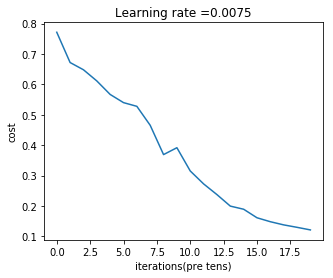

In [83]:
layers_dims = [12288, 20, 7, 5, 1]
parameters = dnn_model(train_x, train_y, layers_dims, num_iterations=2000, print_cost=True)

In [84]:
def predict(X,parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i]>0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p

In [86]:
pred_train = predict(train_x,parameters)
print("预测准确率是: ", np.sum((pred_train == train_y) / train_x.shape[1]))

预测准确率是:  0.9808612440191385
